# Deep Learning - Part 1

#### Content

1. Mathematical Building Blocks of a Neuronal Network
    1. Tensors and Tensor Operations    
    
**Source**: Deep Learning with Python, Francois Chollet

#### Installing Keras as part of Tensorflow

```pip install tensorflow```

### 1. First Look at a neuronal network with Keras
In the next section, we’ll review each element in the example and explain them in detail. So don’t worry if
some steps seem arbitrary or look like magic to you!

#### Problem to solve: Classify hand written digits using the MNIST dataset 

It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the
“Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected.

<img src="resources/img1.png" width="400">

In [1]:
# Load MNIST data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


#### Eyeball data
The images are encoded as Numpy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.

In [2]:
# Training Data
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# Test Data
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
#### Our first neural network architecture

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

network.add(layers.Dense(10, activation='softmax'))

# Who can describe this network?

2022-05-17 11:52:45.276887: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-17 11:52:45.277106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


**Interpretation of the network**: Here, our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (summing
to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes.

In [10]:
# To make the network ready for training, we need to pick three more things, as part of the compilation step:
# A loss function
# an optimizer
# metric to monitor during training and testing: for example Accuracy

In [11]:
# All kind of losses tailored for your needs: https://keras.io/api/losses/

In [12]:
# Available optimizers: https://keras.io/api/optimizers/

In [13]:
# And metrics: https://keras.io/api/metrics/

In [14]:
network.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

**Preprocessing the input data**
Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
# Preparing the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# Traing the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-05-17 11:53:19.383544: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-17 11:53:19.512319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 6ms/step - loss: 1.0819 - accuracy: 0.7589
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5128 - accuracy: 0.8740
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4150 - accuracy: 0.8910
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3704 - accuracy: 0.9006
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3430 - accuracy: 0.9064


In [18]:
# Get the metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)

 21/313 [=>............................] - ETA: 1s - loss: 0.3599 - accuracy: 0.8958

2022-05-17 11:53:41.412625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3159 - accuracy: 0.9127


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9127000570297241


In [20]:
# And kid's that how we met our first artificial neural network!
# Let's go into the details of every moving piece

### 2. Data Representation for Neural Networks

At its core, a tensor is a container for data—almost always numerical data. So, it’s a
container for numbers. You may be already familiar with matrices, which are 2D tensors:
tensors are a generalization of matrices to an arbitrary number of dimensions

In [21]:
# 0D tensors
import numpy as np
x = np.array(12)
x

array(12)

In [22]:
x.ndim

0

In [23]:
# 1D tensors
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [24]:
x.ndim

1

In [25]:
# 2D tensors
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [26]:
x.ndim

2

In [27]:
# and so on... 3D, 4D tensors..
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

In [28]:
x.ndim

3

In [29]:
import tensorflow as tf
x = tf.constant([[5, 2], [1, 3]])

print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


#### Key attributes of tensors:

1. number of axes: ndim 
2. shape: tuple of integers that describes how many dimensions the tensor has along each axis
3. data type: type of the data contained in the tensor

In [30]:
# Reload the data 
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print(train_images.ndim)

3


In [32]:
print(train_images.shape)

(60000, 28, 28)


In [33]:
print(train_images.dtype)

uint8


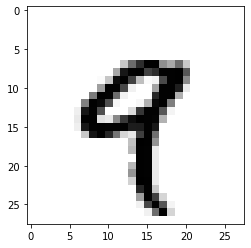

In [34]:
digit = train_images[4] # 5th element
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of
60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients
between 0 and 255.

In [35]:
#### Selecting with tensors in Numpy

In [36]:
my_slice = train_images[10:100]

In [37]:
# Selected 90 hand-written digits
my_slice.shape

(90, 28, 28)

In [38]:
# results in the same slice
my_slice = train_images[10:100, :, :]

In [39]:
# or more verbose
my_slice = train_images[10:100, 0:28, 0:28]

In [40]:
# but we could focus only on a subset of the pixel for each picture (lower right part of the picture)
my_slice = train_images[:, 14:, 14:]

In [41]:
my_slice.shape

(60000, 14, 14)

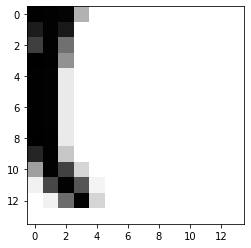

In [42]:
digit = my_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [43]:
# Or, like negative indices in Python lists
my_slice = train_images[:, 7:-7, 7:-7]

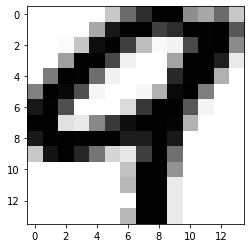

In [44]:
digit = my_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### The notion of data batches
In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll
come across in deep learning will be the samples axis (sometimes called the samples
dimension). In the MNIST example, samples are images of digits.

In [45]:
# Example batching for the n-th batch
n = 3
batch = train_images[128 * n:128 * (n + 1)]

In [46]:
batch.shape

(128, 28, 28)

#### Real world examples of tensors
1. vector data : 2d tensors (sample, features)
2. timeseries: 3d tensors (sample, timestep, feature)
3. image: 4d tensors (sample, height, width, channel (color)) 
4. video: 5d tensors (sample, frames, height, width, channel)

Timeseries
<img src="resources/img2.png" width="300">

Video Frames
<img src="resources/img3.png" width="300">

### 3. Tensor Operations

In [47]:
# keras.layers.Dense(512, activation='relu') 
# equals
# output = relu(dot(W, input) + b) 

In [48]:
# Elementwise operations allow us to parallize many computations.
# The elementwise operations are implemented with numpy array, so nothing changes here.

# Example 
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

#### Broadcasting
We will encouter many situation in which we want to work with different dimensioned vectors, 
however our naive approach with numpy does not work here. Thus, keras supports a method to "broadcast" the dimension - i.e., artificially match the dimension of vectors without creating objects in the memory. 

#### Tensor Dot 
Computes the dot product betweet two tensors - e.g., two vectors -> inner product

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

**Not** to be confused with the elementwise product.

In [49]:
# Example tensor dot computation
import numpy as np
z = np.dot(x, x)

#### Tensor Reshaping
Finally, tensor reshaping. We have already used this method in previous workshops to change the shape of arrays. 

In [50]:
train_images = train_images.reshape((60000, 28 * 28))

### 4. Task - Create a Neural Network which can identify whether a number is 4 or not.

In [51]:
# What needs to change? Which activation function at the output node? Which loss function to take?

In [52]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Build Network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(1, activation='softmax'))

# Compile network 
network.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Get the metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)

Epoch 1/5


2022-05-17 12:09:53.800227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.1074
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
 33/313 [==>...........................] - ETA: 1s - loss: nan - accuracy: 0.0843

2022-05-17 12:10:08.821462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980


In [53]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Create Binary Case
train_labels = np.where(train_labels==4, 1, 0)
test_labels = np.where(test_labels==4, 1, 0)

# Build Network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(1, activation='sigmoid'))

# Compile network 
network.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Get the metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)

Epoch 1/5


2022-05-17 12:11:13.481328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 5ms/step - loss: 0.1978 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1117 - accuracy: 0.9668
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0883 - accuracy: 0.9737
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0770 - accuracy: 0.9772
Epoch 5/5
 50/313 [===>..........................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9750

2022-05-17 12:11:24.445115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9783


### 5. Sentiment Analysis with Neural Networks - Classifying movie reviews 

IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [55]:
# loading the data
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

In [56]:
# Represents a review.
# Each word is encoded (for example the word "boring" could have the numerical code 17)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [57]:
# Training Label
# 0 stands for negative, 1 for positive

In [58]:
train_labels[0]

1

In [59]:
# Decoding a review for illustration purpose
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 1s 0us/step


In [60]:
# print decoded review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [61]:
# Transforming input data to suitable format 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Task: 
Develop a Deep Neural Network with Input Layer, Hidden Layer (16 Nodes), Hidden Layer (16 Nodes) 
and 1 Output. 

1. Use RELU for the hidden layer activations and a sigmoid actitvation function for the output layer.
2. Use Stochastic Gradient Descent to optimize the network
3. Select an appropriate loss function and metric 


What happens when you increase the epoch (from perhaps 2 to 10)? 
Also, analyze what happens when you vary the batch size?
Analyze what happens when you add one more hidden layer?

In [62]:
# Solution
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=2, batch_size=16)

results = model.evaluate(x_test, test_labels)

Epoch 1/2


2022-05-17 12:12:03.375976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 9s 5ms/step - loss: 0.5036 - accuracy: 0.7780
Epoch 2/2
 25/782 [..............................] - ETA: 3s - loss: 0.2941 - accuracy: 0.8862

2022-05-17 12:12:20.778966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.3005 - accuracy: 0.8762


In [63]:
# Print results (loss, accuracy)
results 

[0.3005426824092865, 0.8761600852012634]

In [64]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=10, batch_size=16)

results = model.evaluate(x_test, test_labels)

Epoch 1/10
  21/1563 [..............................] - ETA: 8s - loss: 0.6928 - accuracy: 0.5565

2022-05-17 12:12:32.172641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 8s 5ms/step - loss: 0.5032 - accuracy: 0.7792
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2971 - accuracy: 0.8783
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2492 - accuracy: 0.9013
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2208 - accuracy: 0.9124
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2015 - accuracy: 0.9218
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1827 - accuracy: 0.9292
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1696 - accuracy: 0.9326
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1555 - accuracy: 0.9405
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1453 - accuracy: 0.9420
Epoch 10/10
 21/782 [..............................] - ETA: 4s - loss: 0.3674 - accuracy: 0.8

2022-05-17 12:13:51.959477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.3631 - accuracy: 0.8691


In [65]:
# Print results (loss, accuracy)
results 

[0.36313295364379883, 0.8690800666809082]

In [66]:
# Less backprop steps
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=10, batch_size=1024)

results = model.evaluate(x_test, test_labels)

Epoch 1/10


2022-05-17 12:20:51.615793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 17ms/step - loss: 0.6927 - accuracy: 0.5147
Epoch 2/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6916 - accuracy: 0.5278
Epoch 3/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6905 - accuracy: 0.5420
Epoch 4/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6889 - accuracy: 0.5576
Epoch 5/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6865 - accuracy: 0.5773
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6828 - accuracy: 0.5955
Epoch 7/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6773 - accuracy: 0.6103
Epoch 8/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6698 - accuracy: 0.6328
Epoch 9/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6609 - accuracy: 0.6577
Epoch 10/10
 24/782 [..............................] - ETA: 3s - loss: 0.6468 - accuracy: 0.6966

2022-05-17 12:20:56.514325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.6479 - accuracy: 0.6937


In [67]:
# Results
results

[0.6478953957557678, 0.6936800479888916]

In [68]:
# A model which might be prone to overfitting
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=10, batch_size=16)

results = model.evaluate(x_test, test_labels)

Epoch 1/10
  16/1563 [..............................] - ETA: 10s - loss: 0.6957 - accuracy: 0.4961

2022-05-17 12:21:09.662991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.4483 - accuracy: 0.8040
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2827 - accuracy: 0.8857
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2353 - accuracy: 0.9090
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2063 - accuracy: 0.9192
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1793 - accuracy: 0.9314
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1560 - accuracy: 0.9406
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1292 - accuracy: 0.9536
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1067 - accuracy: 0.9630
Epoch 9/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0810 - accuracy: 0.9745
Epoch 10/10
 21/782 [..............................] - ETA: 3s - loss: 0.3809 - accu

2022-05-17 12:22:57.783705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 4ms/step - loss: 0.4019 - accuracy: 0.8720


In [69]:
# overfitted results
results

[0.40194380283355713, 0.8720400333404541]

### Few last words: using a trained network to generate predictions



In [70]:
model.predict(x_test) # <- Here, you can pass any data...

2022-05-17 13:39:05.407256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.08382644],
       [0.9999944 ],
       [0.6880363 ],
       ...,
       [0.1475069 ],
       [0.01761602],
       [0.9954562 ]], dtype=float32)